In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math as math
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import fbprophet as fb
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/solar-power-generation-data/Plant_2_Generation_Data.csv
/kaggle/input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv
/kaggle/input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv
/kaggle/input/solar-power-generation-data/Plant_1_Generation_Data.csv


In [2]:
dfGeneration_1 = pd.read_csv('../input/solar-power-generation-data/Plant_1_Generation_Data.csv')
dfWeatherSensor_1 = pd.read_csv('../input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv')
dfGeneration_2 = pd.read_csv('../input/solar-power-generation-data/Plant_2_Generation_Data.csv')
dfWeatherSensor_2 = pd.read_csv('../input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv')

In [3]:
# SPLITTING DATETIME INTO DATE, TIME, HOURS AND MINUTES
dfGeneration_1['DATE_TIME'] = pd.to_datetime(dfGeneration_1['DATE_TIME'], format ='%d-%m-%Y %H:%M')
dfGeneration_1['DATE'] = dfGeneration_1['DATE_TIME'].dt.date
dfGeneration_1['DATE'] = pd.to_datetime(dfGeneration_1['DATE'],format = '%Y-%m-%d')
dfGeneration_1['TIME'] = dfGeneration_1['DATE_TIME'].dt.time
dfGeneration_1['TIME'] = pd.to_datetime(dfGeneration_1['TIME'], format = '%H:%M:%S')
dfGeneration_1['HOUR'] = pd.to_datetime(dfGeneration_1['TIME'],format='%H:%M:%S').dt.hour
dfGeneration_1['MINUTES'] = pd.to_datetime(dfGeneration_1['TIME'],format='%H:%M:%S').dt.minute
dfGeneration_1.info()

dfGeneration_2['DATE_TIME'] = pd.to_datetime(dfGeneration_2['DATE_TIME'], format ='%Y-%m-%d %H:%M')
dfGeneration_2['DATE'] = dfGeneration_2['DATE_TIME'].dt.date
dfGeneration_2['DATE'] = pd.to_datetime(dfGeneration_2['DATE'],format = '%Y-%m-%d')
dfGeneration_2['TIME'] = dfGeneration_2['DATE_TIME'].dt.time
dfGeneration_2['TIME'] = pd.to_datetime(dfGeneration_2['TIME'], format = '%H:%M:%S')
dfGeneration_2['HOUR'] = pd.to_datetime(dfGeneration_2['TIME'],format='%H:%M:%S').dt.hour
dfGeneration_2['MINUTES'] = pd.to_datetime(dfGeneration_2['TIME'],format='%H:%M:%S').dt.minute
dfGeneration_2.info()

dfWeatherSensor_1['DATE_TIME'] = pd.to_datetime(dfWeatherSensor_1['DATE_TIME'], format ='%Y-%m-%d %H:%M')
dfWeatherSensor_1['DATE'] = dfWeatherSensor_1['DATE_TIME'].dt.date
dfWeatherSensor_1['DATE'] = pd.to_datetime(dfWeatherSensor_1['DATE'],format = '%Y-%m-%d')
dfWeatherSensor_1['TIME'] = dfWeatherSensor_1['DATE_TIME'].dt.time
dfWeatherSensor_1['TIME'] = pd.to_datetime(dfWeatherSensor_1['TIME'], format = '%H:%M:%S')
dfWeatherSensor_1['HOUR'] = pd.to_datetime(dfWeatherSensor_1['TIME'],format='%H:%M:%S').dt.hour
dfWeatherSensor_1['MINUTES'] = pd.to_datetime(dfWeatherSensor_1['TIME'],format='%H:%M:%S').dt.minute
dfWeatherSensor_1.info()

dfWeatherSensor_2['DATE_TIME'] = pd.to_datetime(dfWeatherSensor_2['DATE_TIME'], format ='%Y-%m-%d %H:%M')
dfWeatherSensor_2['DATE'] = dfWeatherSensor_2['DATE_TIME'].dt.date
dfWeatherSensor_2['DATE'] = pd.to_datetime(dfWeatherSensor_2['DATE'],format = '%Y-%m-%d')
dfWeatherSensor_2['TIME'] = dfWeatherSensor_2['DATE_TIME'].dt.time
dfWeatherSensor_2['TIME'] = pd.to_datetime(dfWeatherSensor_2['TIME'], format = '%H:%M:%S')
dfWeatherSensor_2['HOUR'] = pd.to_datetime(dfWeatherSensor_2['TIME'],format='%H:%M:%S').dt.hour
dfWeatherSensor_2['MINUTES'] = pd.to_datetime(dfWeatherSensor_2['TIME'],format='%H:%M:%S').dt.minute
dfWeatherSensor_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
 7   DATE         68778 non-null  datetime64[ns]
 8   TIME         68778 non-null  datetime64[ns]
 9   HOUR         68778 non-null  int64         
 10  MINUTES      68778 non-null  int64         
dtypes: datetime64[ns](3), float64(4), int64(3), object(1)
memory usage: 5.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------    


It was June, and Tamil Nadu was all glowed up. The fields were shining and the villages were waiting for electrcity to reach them. At this moment, Munshi Prathaman, an environmental professor at Tamil Nadu University of Applied Sciences, was in his residence waiting for his breakfast at the table.
As the strong smell of cardamom made its way out of the sambar through the kitchen to Munshi, he received a call. It was Mr. Bason Mount, a multi millionaire from the United States of America, requesting for a meeting with Munshi at a cafe near the university.

Munshi being an extraordinary brain had planted solar plants across his 5 acre field. He was a kind hearted person who had devoted his whole life to research and supplying electricity to the villagers, who are in need. 

It was 2 in the afternoon and Mr. Bason and Munshi were sipping coffee when Bason came up with his request. He asked Munshi to supply his company with inverters which would yield great amounts of solar energy for his multiple offices and fields back in the States. Munshi being a generous person couldn’t say no and scheduled a meeting at his field at 6 in the evening.

The clock struck 6 and Munshi reached his field for his daily check but this time with Mr. Bason. The field was huge, with multiple solar panels spread across the field. Mr. Bason was in awe and was excited to see what Munshi had to offer. 
Munshi took Mr. Bason to his main solar plant and asked him if he wanted to know anything before forming a deal.
Mr Bason being a businessman had some questions in his mind. 

"This is huge! How many inverters are there Munshi?" Bason questioned. "To be honest sir, I don't know the exact number but give me a minute I'll just look into my books."

In [4]:
# How many inverters
#Plant 1
print("The number of inverters in plant 1-", dfGeneration_1['SOURCE_KEY'].nunique())
#Plant 2
print("The number of inverters in plant 2-", dfGeneration_2['SOURCE_KEY'].nunique())


The number of inverters in plant 1- 22
The number of inverters in plant 2- 22


"Okay, so there are 2 plants with 22 inverters each sir." Munshi replied. "That's impressive Munshi!" "With there being so many inverters with each generating some power, can you tell me how you would corelate the irradiation with DC power?" Bason questioned.    "Yes sir, just a moment." 

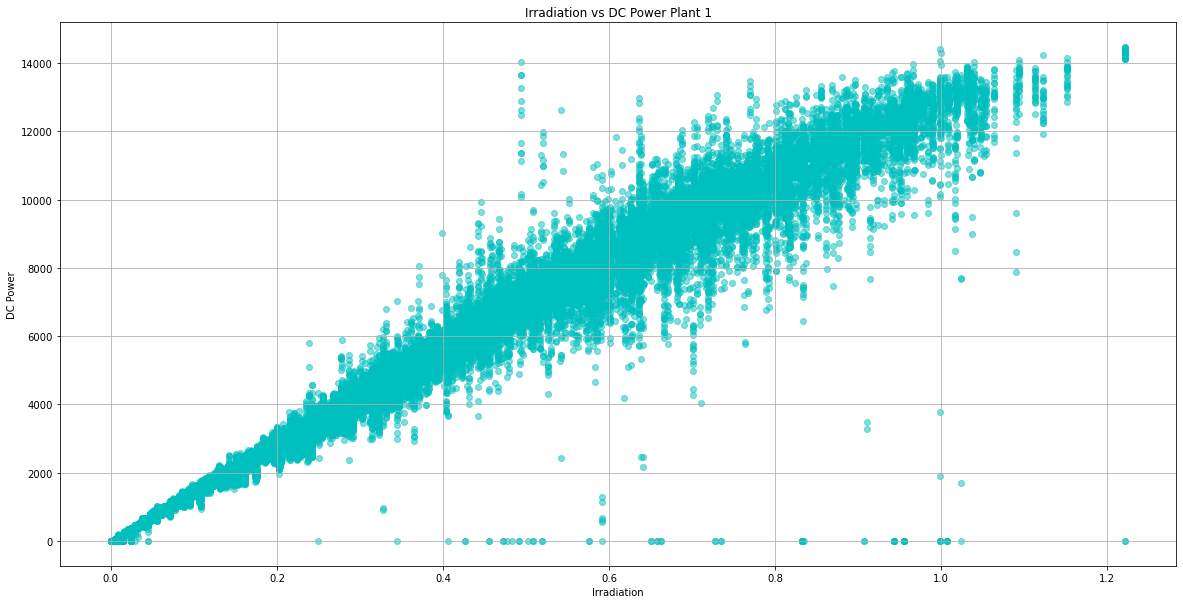

In [5]:
# IRRADIATION VS DC
# PLANT 1
df_plant1 = pd.merge(dfGeneration_1, dfWeatherSensor_1, on='DATE_TIME', how='left')
plt.figure(figsize=(20,10))
plt.title("Irradiation vs DC Power Plant 1")
plt.scatter(df_plant1['IRRADIATION'], df_plant1['DC_POWER'], c='c', alpha=0.5)
plt.xlabel("Irradiation")
plt.ylabel("DC Power")
plt.grid()
plt.show()

> "Okay, so as you can see here in my book, we have a scatter plot corelating irradiation and DC power for plant 1. Here on this x-axis we have irradiation and on the y-axis we have DC power."

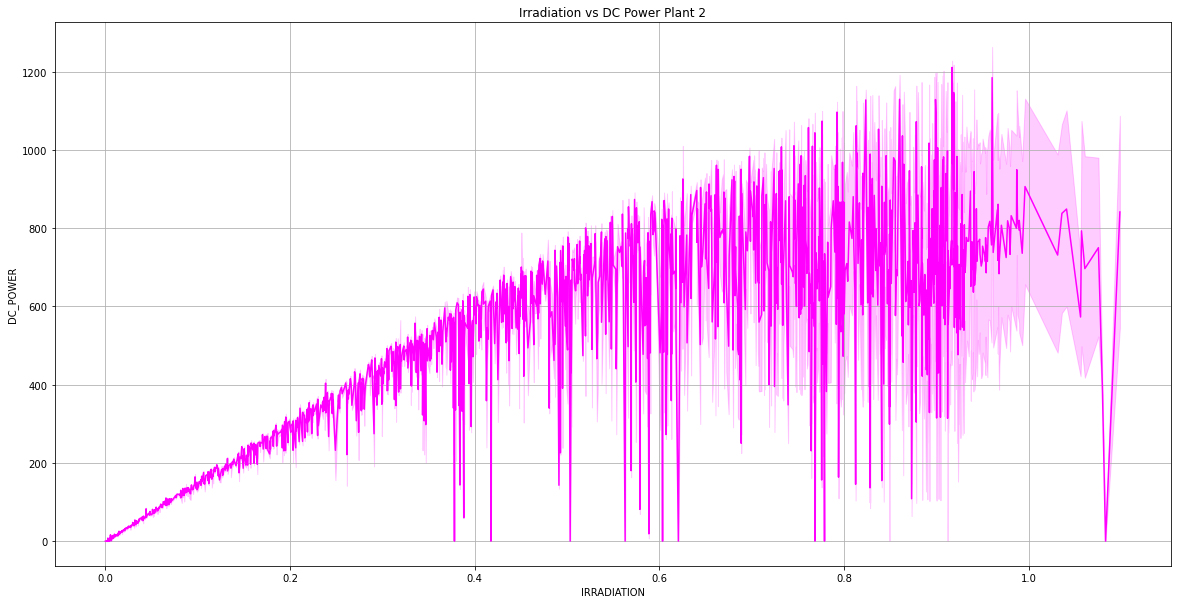

In [6]:
# PLANT 2
df_plant2 = pd.merge(dfGeneration_2, dfWeatherSensor_2, on='DATE_TIME', how='left')
plt.figure(figsize=(20,10))
plt.title("Irradiation vs DC Power Plant 2")
sns.lineplot(x='IRRADIATION', y='DC_POWER', data=df_plant2, color='magenta')
plt.grid()
plt.show()

"Here is the plot for plant 2. Same as the 1st one, irradiation on the x-axis and DC power on the y-axis." Munshi replied.

"You have everything ready!" "I was wondering if you can tell me about the Ambient and Module temperature? My team is very curious to know." Bason replied. "Yes sure sir. I know a way through which I can explain it to you the best. I have a heat map, let me just show it to you." Munshi replied.

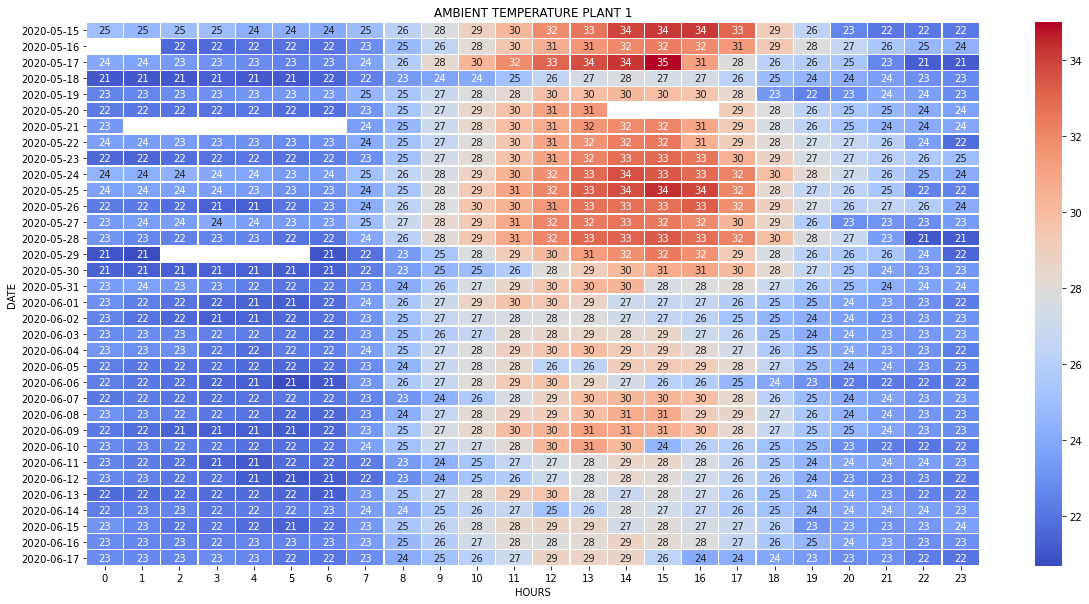

In [7]:
#Heat Map Amb Temp
# PLANT 1
df_amb1 = pd.read_csv("../input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv")
df_amb1 = df_amb1.drop(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'MODULE_TEMPERATURE', 'IRRADIATION'], axis=1)
df_amb1['DATE'] = dfWeatherSensor_1['DATE'].dt.date
df_amb1['HOUR'] = dfWeatherSensor_1['TIME'].dt.hour
df_amb1 = df_amb1.groupby(['HOUR', 'DATE']).mean()
df_amb1 = df_amb1.unstack(level=0)

x_labels = list()
for i in range(24):
    x_labels.append(i)
plt.figure(figsize=(20, 10))
plt.title("AMBIENT TEMPERATURE PLANT 1")
sns.heatmap(df_amb1, cmap="coolwarm", linewidth=0.3, annot=True)
plt.xticks(np.arange(24)+0.5, labels=x_labels)
plt.xticks(rotation=0)
plt.xlabel('HOURS')
plt.ylabel('DATE')
plt.show()


"Here sir! This is the heat map for the 1st plant for Ambient Temperature, and for the 2nd it is..."

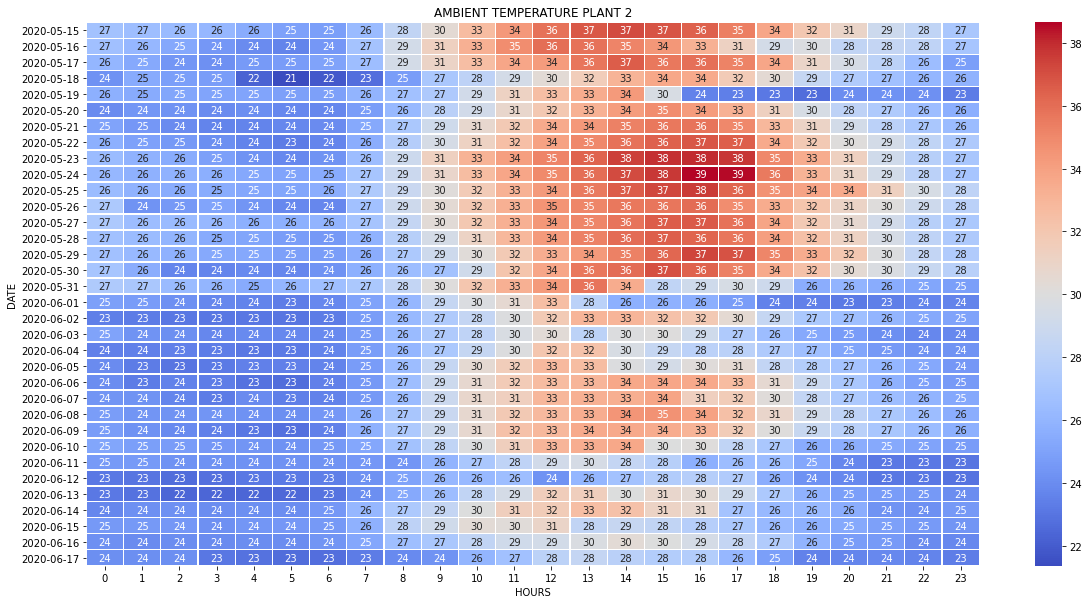

In [8]:
# Plant 2
df_amb2 = pd.read_csv("../input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv")
df_amb2 = df_amb2.drop(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'MODULE_TEMPERATURE', 'IRRADIATION'], axis=1) 
df_amb2['DATE'] = dfWeatherSensor_2['DATE'].dt.date
df_amb2['HOUR'] = dfWeatherSensor_2['TIME'].dt.hour
df_amb2 = df_amb2.groupby(['HOUR', 'DATE']).mean()
df_amb2 = df_amb2.unstack(level=0)

x_labels = list()
for i in range(24):
    x_labels.append(i)
plt.figure(figsize=(20, 10))
plt.title("AMBIENT TEMPERATURE PLANT 2")
sns.heatmap(df_amb2, cmap="coolwarm", linewidth=0.3, annot=True)
plt.xticks(np.arange(24)+0.5, labels=x_labels)
plt.xticks(rotation=0)
plt.xlabel('HOURS')
plt.ylabel('DATE')
plt.show()


"Here! This is the 2nd heat map for plant 2 for Ambient temperature." Said Munshi. "Impresive! Can i have a look at the Module temperature map?" Bason asked. "Sure sir! Just a moment." Munshi replied.

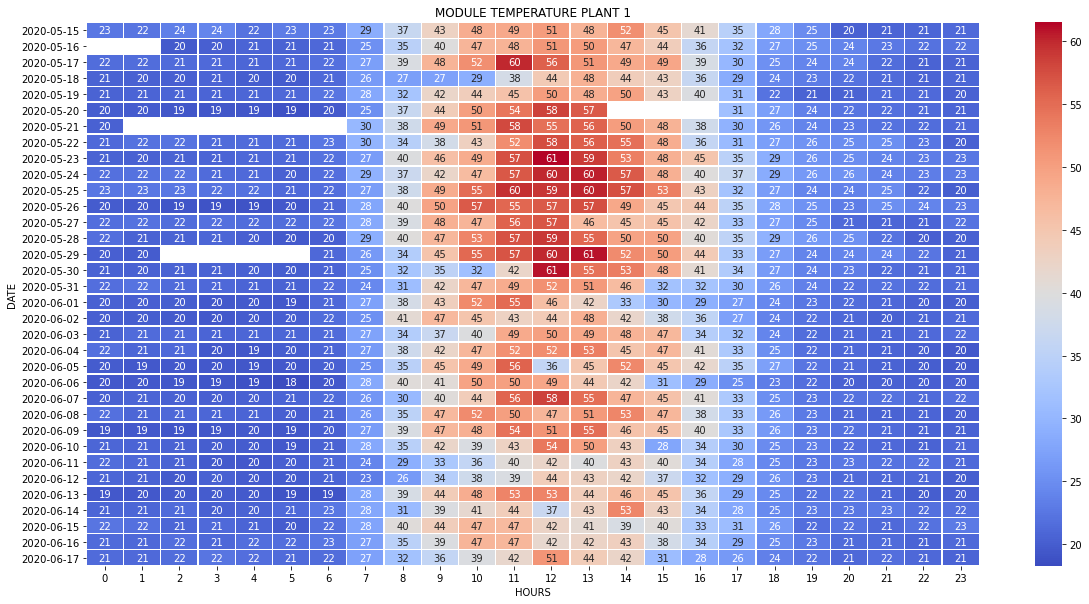

In [9]:
# 2) Heat Map Mod Temp
# PLANT 1
df_mod1 = pd.read_csv("../input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv")
df_mod1 = df_mod1.drop(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'AMBIENT_TEMPERATURE', 'IRRADIATION'], axis=1)
df_mod1['DATE'] = dfWeatherSensor_1['DATE'].dt.date
df_mod1['HOUR'] = dfWeatherSensor_1['TIME'].dt.hour
df_mod1 = df_mod1.groupby(['HOUR', 'DATE']).mean()
df_mod1 = df_mod1.unstack(level=0)

x_labels = list()
for i in range(24):
    x_labels.append(i)
plt.figure(figsize=(20, 10))
plt.title("MODULE TEMPERATURE PLANT 1")
sns.heatmap(df_mod1, cmap="coolwarm", linewidth=0.3, annot=True)
plt.xticks(np.arange(24)+0.5, labels=x_labels)
plt.xticks(rotation=0)
plt.xlabel('HOURS')
plt.ylabel('DATE')
plt.show()

"Here you go sir! You can have a look!" Munshi exclaimed. "For plant 2?" Bason asked. "Yes sure, just a moment." 

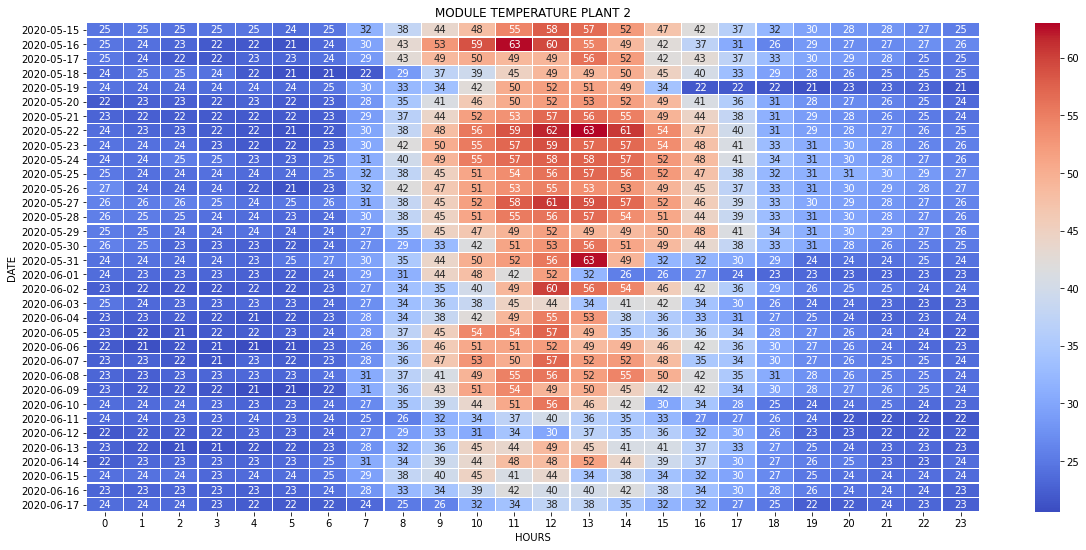

In [10]:
# Plant 2
df_mod2 = pd.read_csv("../input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv")
df_mod2 = df_mod2.drop(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'AMBIENT_TEMPERATURE', 'IRRADIATION'], axis=1) 
df_mod2['DATE'] = dfWeatherSensor_2['DATE'].dt.date
df_mod2['HOUR'] = dfWeatherSensor_2['TIME'].dt.hour
df_mod2 = df_mod2.groupby(['HOUR', 'DATE']).mean()
df_mod2 = df_mod2.unstack(level=0)

x_labels = list()
for i in range(24):
    x_labels.append(i)
plt.figure(figsize=(20, 9))
plt.title("MODULE TEMPERATURE PLANT 2")
sns.heatmap(df_mod2, cmap="coolwarm", linewidth=0.3, annot=True)
plt.xticks(np.arange(24)+0.5, labels=x_labels)
plt.xticks(rotation=0)
plt.xlabel('HOURS')
plt.ylabel('DATE')
plt.show()

"Here you go! This is for the 2nd plant." Munshi replied. "I must say this Munshi, this is quite impressive! You're not only a good scientist but a pretty good business man too!" Bason exclaimed. "Okay, so can you tell me about the corelation between Ambient temperature and DC power?" Bason requested. "Why not sir, just a moment..." 

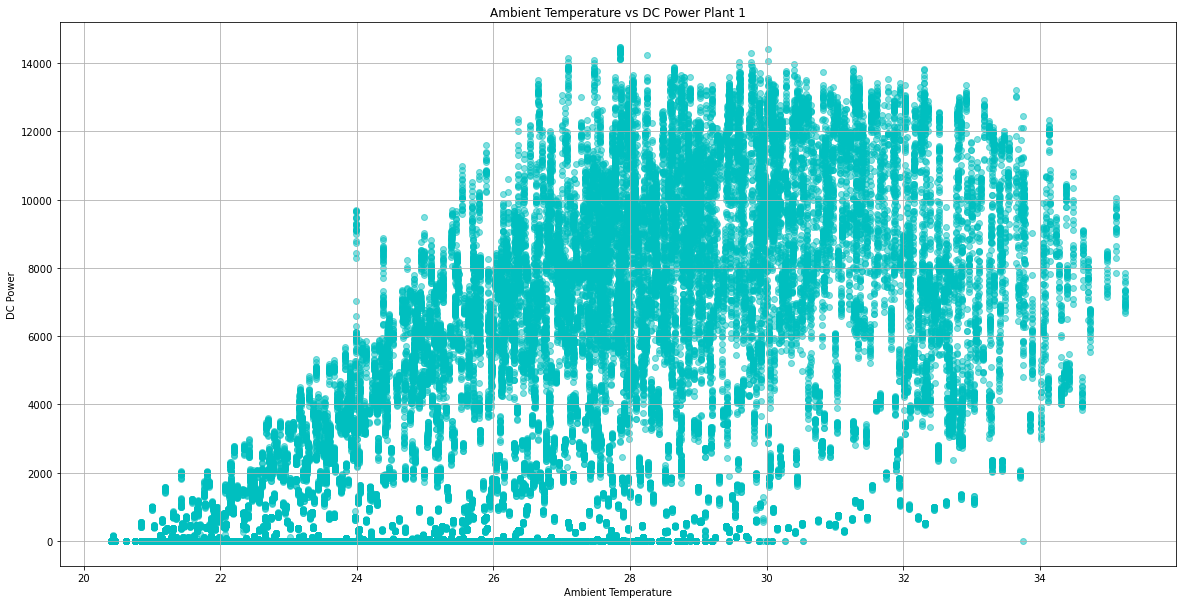

In [11]:
df_plant1 = pd.merge(dfGeneration_1, dfWeatherSensor_1, on='DATE_TIME', how='left')
plt.figure(figsize=(20,10))
plt.title("Ambient Temperature vs DC Power Plant 1")
plt.scatter(df_plant1['AMBIENT_TEMPERATURE'], df_plant1['DC_POWER'], c='c', alpha=0.5)
plt.xlabel("Ambient Temperature")
plt.ylabel("DC Power")
plt.grid()
plt.show()

"Here it is sir! This is a scatter plot showing the corelation between Ambient temperature and DC power. I know it's a bit messy but these datasets are just too big! Take your time sir, we have plenty of time." Munshi replied

"Yes thank you, just give me a moment to look at the plot." "Okay, so I'm quite happy with this Munshi but i want to be completely sure before I proceed with the deal. I would like to know about the predictions, i mean can you predict the outcomes? I want to know if my investment will be beneficial for my company or not. I hope you understand." Said Bason. 

"Absolutely sir! I'll just call an expert, he'll take you through the whole process." Replied Munshi.

Munshi intoduces Mahi to Mr. Bason.

"Greetings Mr. Bason. So predictions, what we do here is that we use a very interesting concept of Machine Learning to predict. I'll take you through the whole process of Linear Regression." Said Mahi. "Yes sure!" Exclaimed Bason.

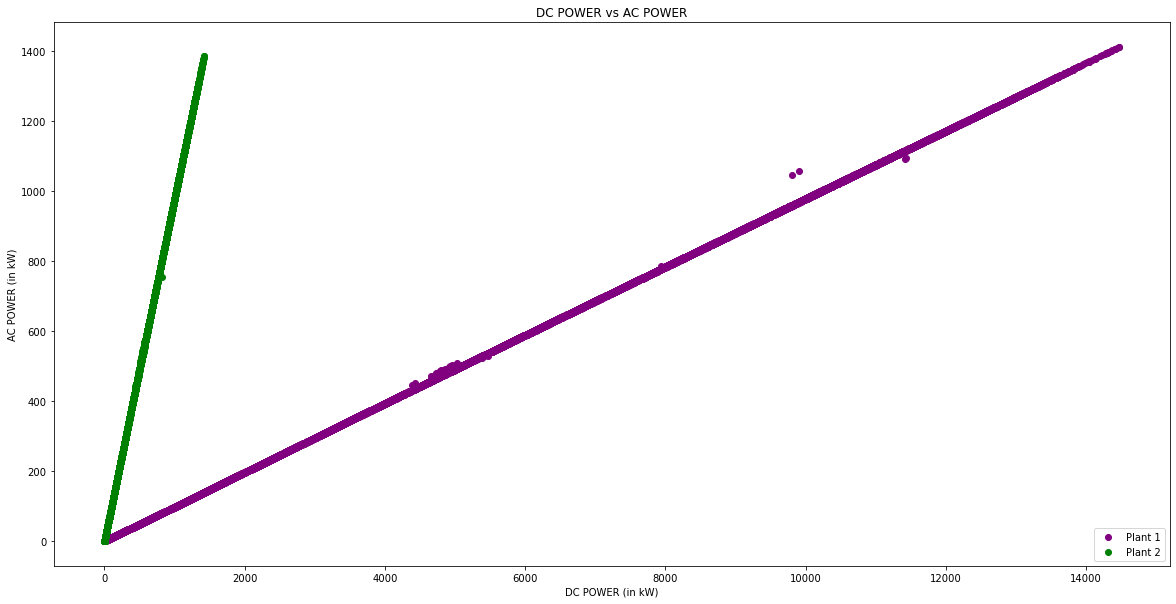

In [12]:
# The LINEAR REGRESSION MODEL
DC_POW1 = dfGeneration_1.iloc[:,[3]].values
AC_POW1 = dfGeneration_1.iloc[:,[4]].values
DC_POW2 = dfGeneration_2.iloc[:,[3]].values
AC_POW2 = dfGeneration_2.iloc[:,[4]]
plt.figure(figsize = (20, 10))
plt.scatter(DC_POW1, AC_POW1, color = 'Purple', label = 'Plant 1')
plt.scatter(DC_POW2, AC_POW2, color = 'Green', label = 'Plant 2')
plt.legend(loc = 'lower right')
plt.xlabel('DC POWER (in kW)')
plt.ylabel('AC POWER (in kW)')
plt.title('DC POWER vs AC POWER')
plt.show()


"So sir as you can see we first start by checking the relation between DC power and AC power"

"Then we go onto creating testing and training the model"

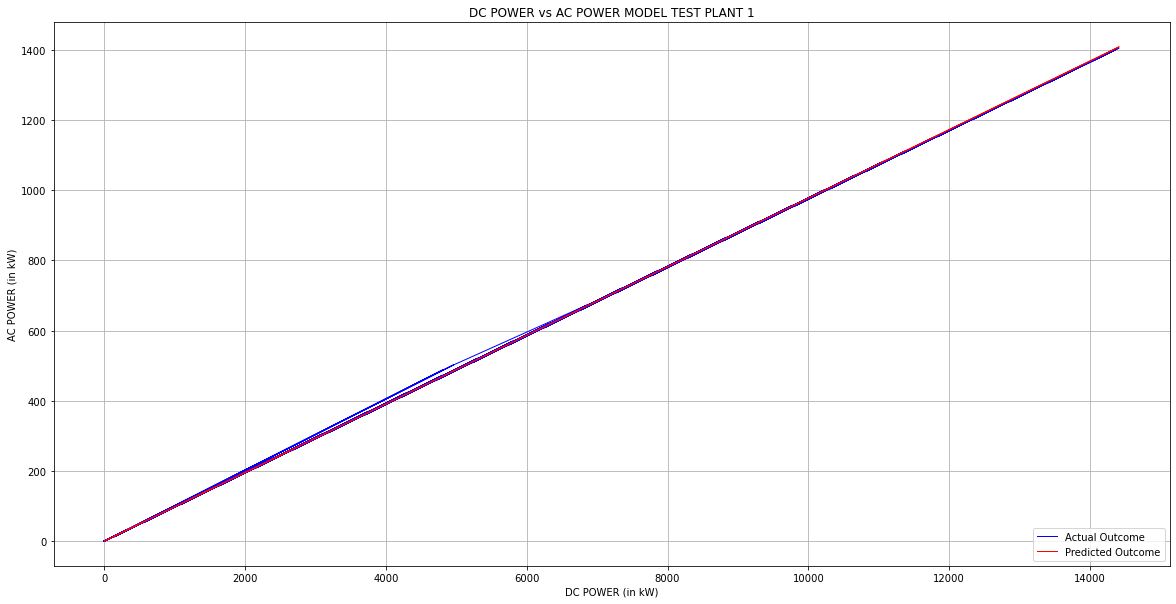

In [13]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = tts(DC_POW1, AC_POW1, test_size = 0.2, random_state = 1)
#Create
model1 = LinearRegression()
#Train
model1.fit(x_train, y_train)
#Test
plt.figure(figsize = (20, 10))
plt.plot(x_test, y_test, color = 'Blue', linewidth = 1, label = 'Actual Outcome')
plt.plot(x_test, model1.predict(x_test), color = 'red', linewidth = 1, label = 'Predicted Outcome')
plt.legend(loc = 'lower right')
plt.xlabel('DC POWER (in kW)')
plt.ylabel('AC POWER (in kW)')
plt.title('DC POWER vs AC POWER MODEL TEST PLANT 1')
plt.grid()
plt.show()

x_test1 = x_test
y_test1 = y_test

"So as you can see that the model can accurately predict DC power to AC power conversions in plant 1. Now we will do the same for Plant 2."

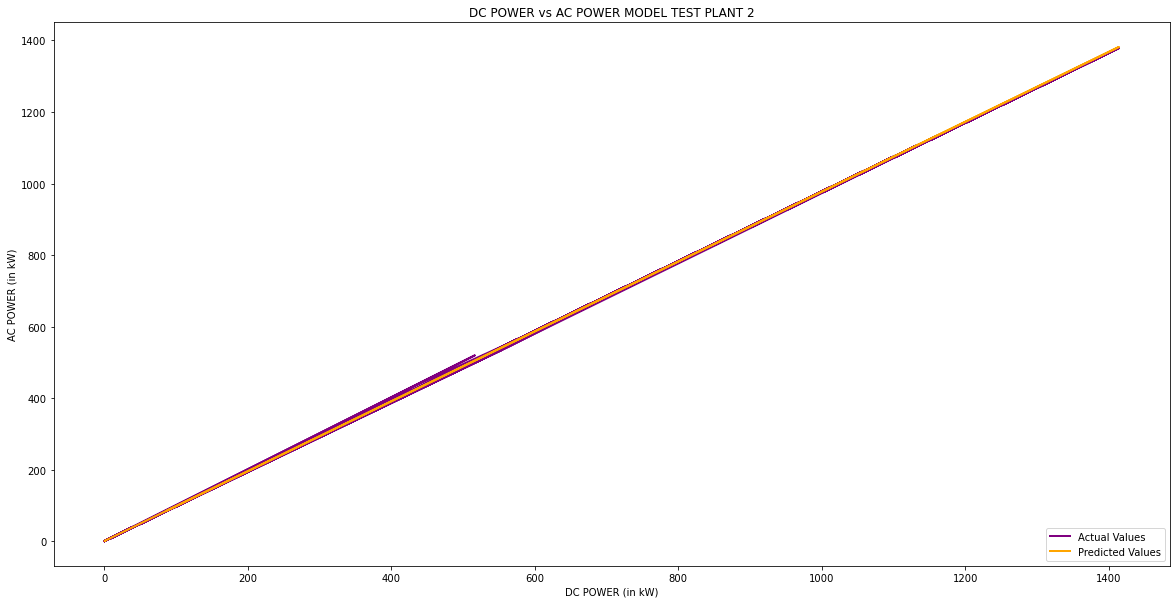

In [14]:
x_train, x_test, y_train, y_test = tts(DC_POW2, AC_POW2, test_size = 0.2, random_state = 18)
model2 = LinearRegression()   #create
model2.fit(x_train, y_train)   #train

plt.figure(figsize = (20, 10))
plt.plot(x_test, y_test, color = 'purple', label = 'Actual Values', linewidth = 2)
plt.plot(x_test, model2.predict(x_test), color = 'orange', label = 'Predicted Values', linewidth = 2)
plt.legend(loc = 'lower right')
plt.xlabel('DC POWER (in kW)')
plt.ylabel('AC POWER (in kW)')
plt.title('DC POWER vs AC POWER MODEL TEST PLANT 2')
plt.show()


"From this we can clearly see that our model for plant 2 is also working accurately."

"Now what we do is that we input random values into our models."

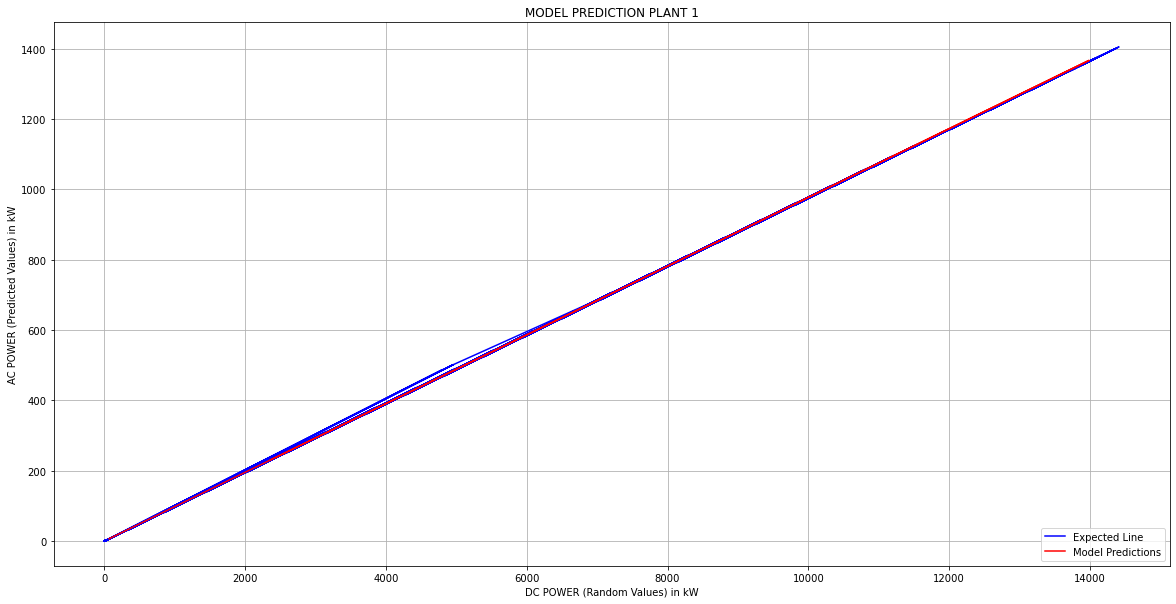

In [15]:
dataP1 = pd.DataFrame({'DC_POWER':np.random.randint(0, 14000, 150)})
dataP1 = dataP1.iloc[:, [0]].values
prediction1 = model1.predict(dataP1)
plt.figure(figsize = (20, 10))
plt.plot(x_test1, y_test1, color = 'Blue', label = 'Expected Line')
plt.plot(dataP1, prediction1, color = 'red', label = 'Model Predictions')
plt.legend(loc = 'lower right')
plt.xlabel('DC POWER (Random Values) in kW')
plt.ylabel('AC POWER (Predicted Values) in kW')
plt.title('MODEL PREDICTION PLANT 1')
plt.grid()
plt.show()

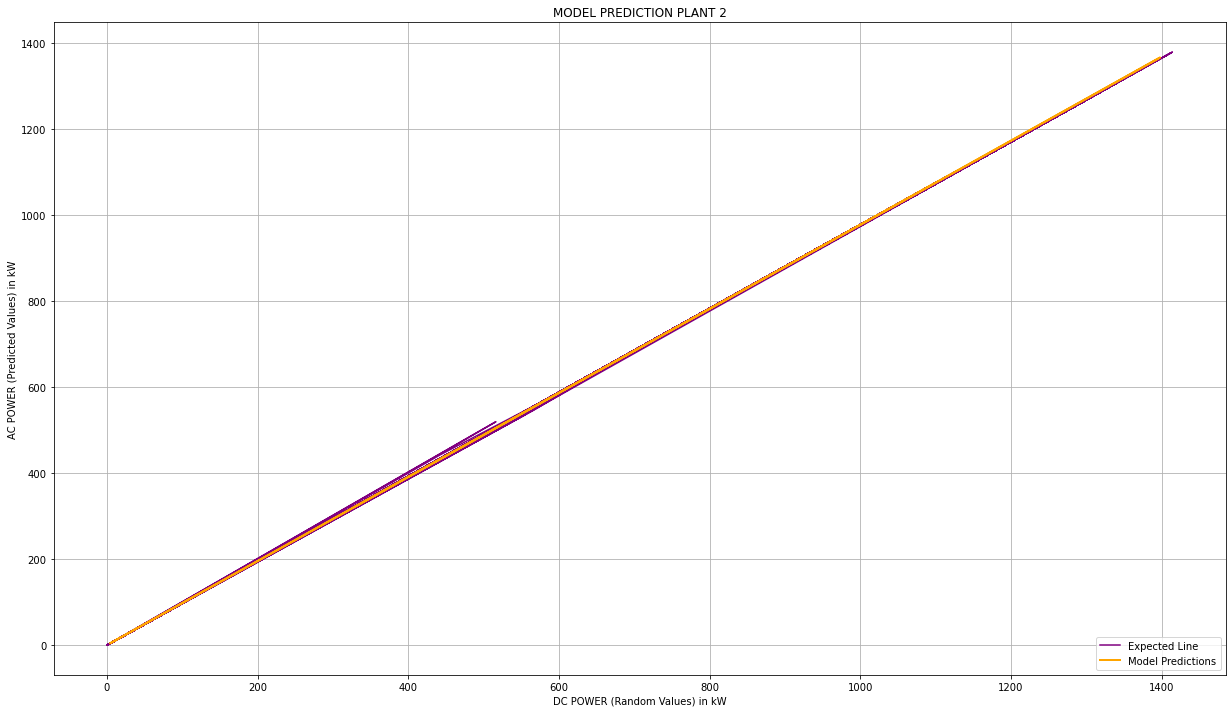

In [16]:
dataP2 = pd.DataFrame({'DC_POWER':np.random.randint(0, 1400, 150)})
dataP2 = dataP2.iloc[:, [0]].values
prediction2 = model2.predict(dataP2)
plt.figure(figsize = (21, 12))
plt.plot(x_test, y_test, color = 'Purple', label = 'Expected Line')
plt.plot(dataP2, prediction2, color = 'Orange', label = 'Model Predictions', linewidth = 2)
plt.legend(loc = 'lower right')
plt.xlabel('DC POWER (Random Values) in kW')
plt.ylabel('AC POWER (Predicted Values) in kW')
plt.title('MODEL PREDICTION PLANT 2')
plt.grid()
plt.show()

"We can clearly see that the predictions of the model to random values of DC power are accurate to the Expected Line." Explained Mahi. "Amazing, I'm not quite sure about what to say. This is just amazing." Replied Bason.

"So as of now i think there's nothing you guys don't have to crack any deal! I'm pretty sure that you might have found out the most consistent inverter too!" Exclaimed Bason. "Yes we have sir!" Mahi replied. "I knew it! Please take me through that too!" Asked Bason. "Sure sir!"

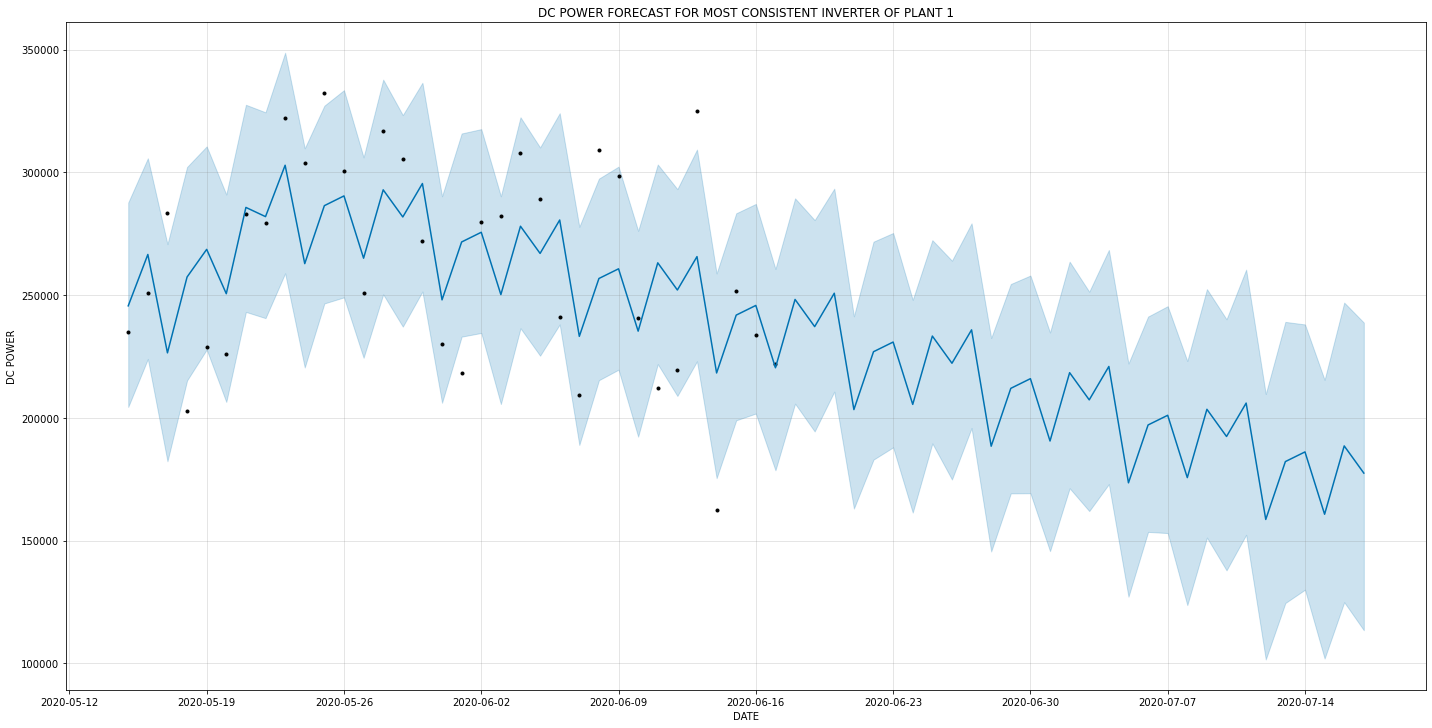

In [17]:
#Most consistent inverter using FBProphet
dates = list()
il = list()
for i in range (0,68778):
    if dfGeneration_1['SOURCE_KEY'][i] == 'bvBOhCH3iADSZry':
        il.append(i)
df3 = dfGeneration_1.iloc[il,:]
dc = df3.groupby('DATE')['DC_POWER'].sum()
df3 = pd.DataFrame({'ds':df3['DATE'].unique(), 'y':dc})

op3 = fb.Prophet(changepoint_prior_scale = 0.25)
op3.fit(df3)
prediction3 = op3.make_future_dataframe(periods = 30, freq = 'D')
prediction3 = op3.predict(prediction3)
op3.plot(prediction3, xlabel = 'DATE', ylabel = 'DC POWER', figsize = (20,10))
plt.title("DC POWER FORECAST FOR MOST CONSISTENT INVERTER OF PLANT 1")
plt.show()

In [18]:
# Consistent 
#PLANT 1

a = dfGeneration_1.groupby('SOURCE_KEY')['DC_POWER'].sum()
powList = list()
source_list = dfGeneration_1['SOURCE_KEY'].unique()
source_valcounts = dfGeneration_1['SOURCE_KEY'].value_counts()
for i in range(0,22):
    counts = source_valcounts[source_list[i]]
    powList.append(a[i]/counts)
num = max(powList)
for o in range(0,22):
    if num == powList[o]:
        print("The most consistent generator in plant 1 is", source_list[o])

The most consistent generator in plant 1 is bvBOhCH3iADSZry


"So as you can see sir, our most consistent inverter for plant 1 is bvBOhCH3iADSZry. For plant 2 it is..

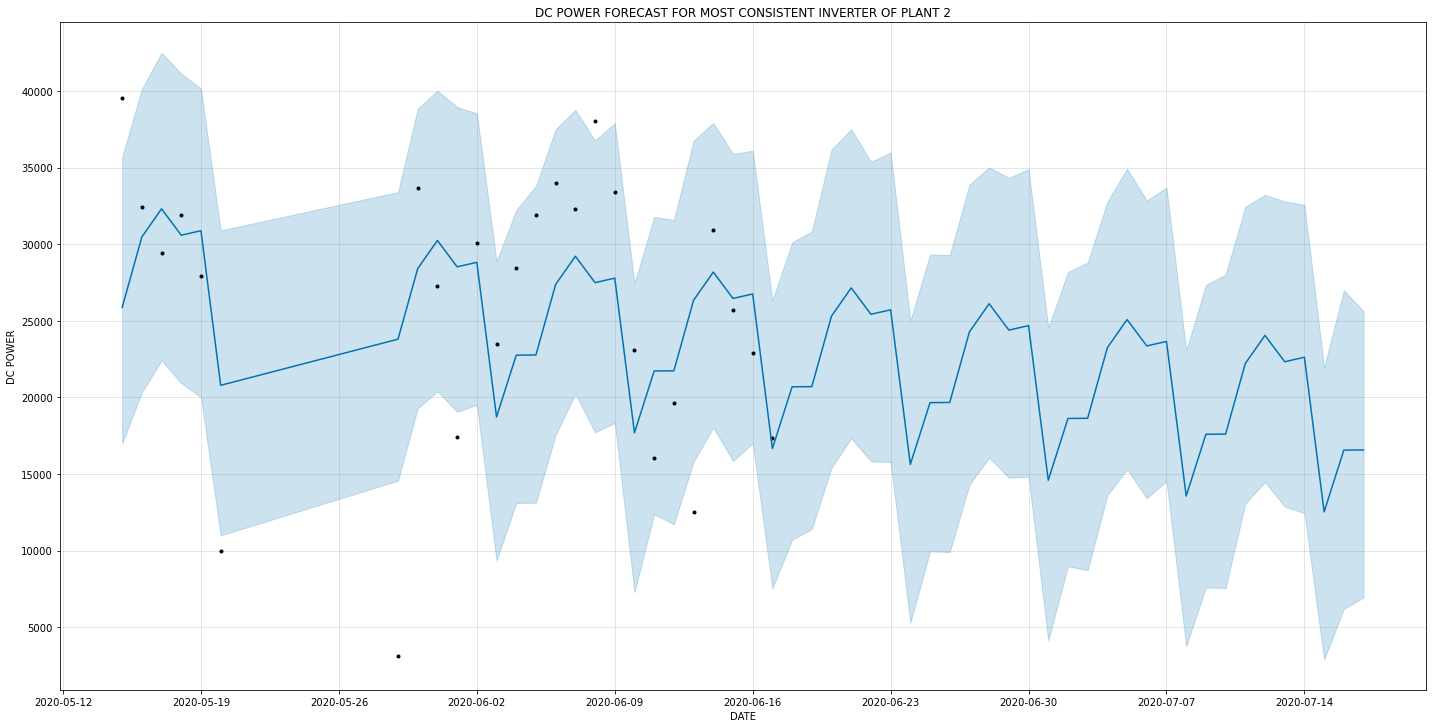

In [19]:
dates2 = list()
il2 = list()
for i in range (0,67698):
    if dfGeneration_2['SOURCE_KEY'][i] == 'IQ2d7wF4YD8zU1Q':
        il2.append(i)
df4 = dfGeneration_2.iloc[il2,:]
dc = df4.groupby('DATE')['DC_POWER'].sum()
df4 = pd.DataFrame({'ds':df4['DATE'].unique(), 'y':dc})

op4 = fb.Prophet(changepoint_prior_scale = 0.25)
op4.fit(df4)
prediction4 = op4.make_future_dataframe(periods = 30, freq = 'D')
prediction4 = op4.predict(prediction4)
op4.plot(prediction4, xlabel = 'DATE', ylabel = 'DC POWER', figsize = (20,10))
plt.title("DC POWER FORECAST FOR MOST CONSISTENT INVERTER OF PLANT 2")
plt.show()

In [20]:
#Plant 2
a2 = dfGeneration_2.groupby('SOURCE_KEY')['DC_POWER'].sum()
powList = list()
source_list = dfGeneration_2['SOURCE_KEY'].unique()
source_valcounts = dfGeneration_2['SOURCE_KEY'].value_counts()
for i in range(0,22):
    counts = source_valcounts[source_list[i]]
    powList.append(a2[i]/counts)
num2 = max(powList)
for o in range(0,22):
    if num2 == powList[o]:
        print("The most consistent generator in plant 2 is", source_list[o])

The most consistent generator in plant 2 is IQ2d7wF4YD8zU1Q


it is IQ2d7wF4YD8zU1Q sir." "Let me just show you our 24hr graphing, i guess that will be enough for you to go ahead with the deal." 

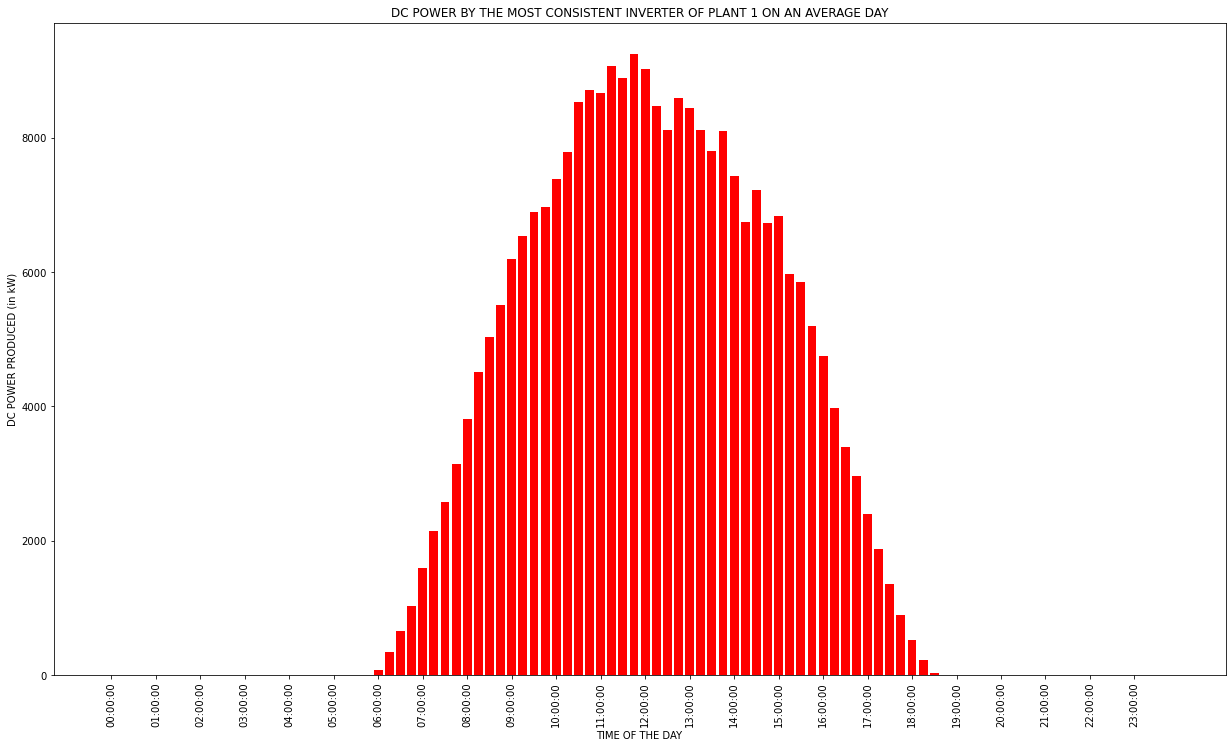

In [21]:
#GRAPHING OVER 24 HRS
#Plant 1(bvBOhCH3iADSZry)

plant1m = pd.DataFrame({'SOURCE_KEY': dfGeneration_1['SOURCE_KEY'], 'TIME': dfGeneration_1['TIME'], 'DC_POWER': dfGeneration_1['DC_POWER']})
plant1m = plant1m.groupby(['SOURCE_KEY', 'TIME']).mean()
StartInv = int()
source_key_check = dfGeneration_1['SOURCE_KEY'].unique()

p = dfGeneration_1['DATE_TIME'].dt.time
uniqueTime = p.unique()
for o in range(0,24*4):
    uniqueTime[o] = str(uniqueTime[o])
TimeList = list()
for i in range(0,24*4, 4):
    TimeList.append(uniqueTime[i])
#SINCE EACH SOURCE KEY HAS 24*4 = 96 ROWS, Whichever Value of source_key_check the invertor is, it starts at the 96*(i+1) position of the new plant1m and ends at the 96*(i+1) + 95th position
for i in range(0,22):
    if source_key_check[i] == 'bvBOhCH3iADSZry':
        StartInv = 96*(i+1)
        
plt.figure(figsize = (21, 12))
plt.bar(uniqueTime,plant1m[StartInv:StartInv+96]['DC_POWER'], color = 'red')
plt.xticks(TimeList, rotation = 90)
plt.xlabel('TIME OF THE DAY')
plt.ylabel('DC POWER PRODUCED (in kW)')
plt.title('DC POWER BY THE MOST CONSISTENT INVERTER OF PLANT 1 ON AN AVERAGE DAY')
plt.show()

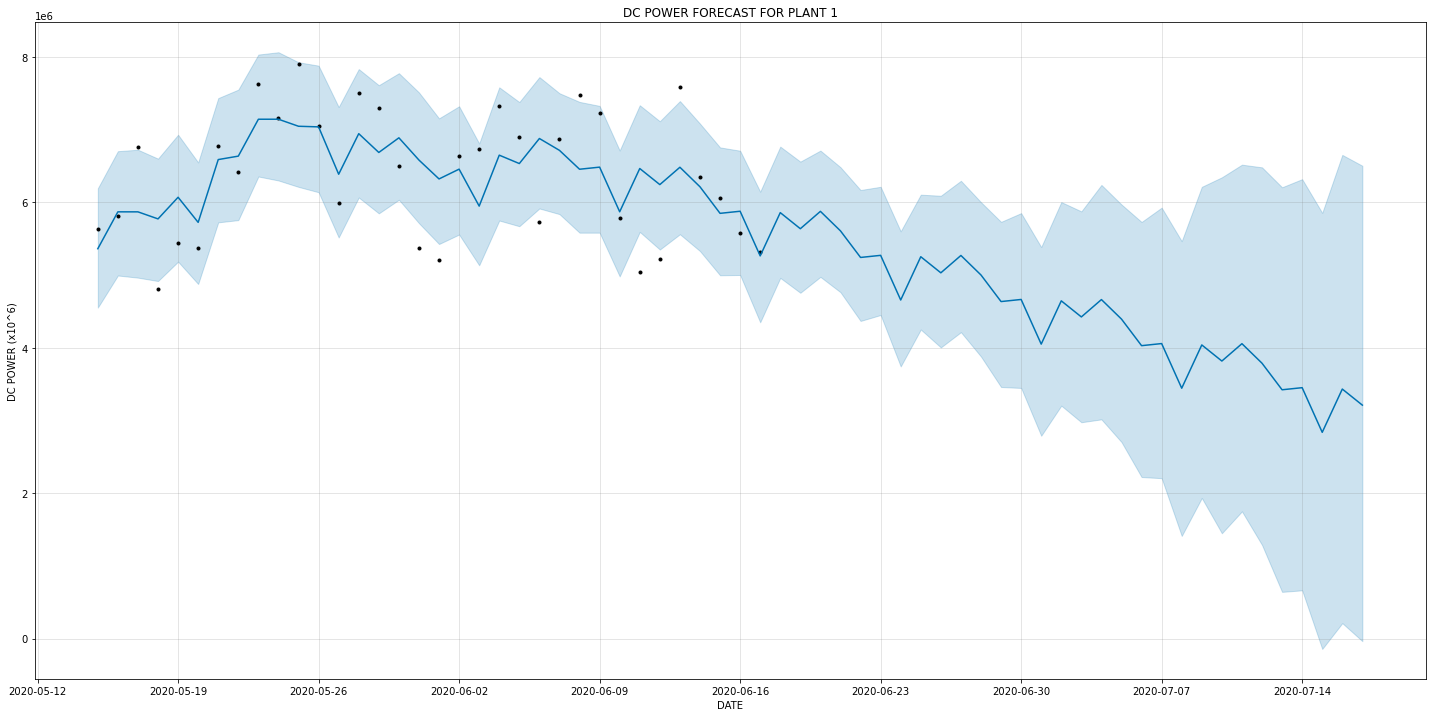

In [22]:
#FBProphet
ds = dfGeneration_1['DATE'].unique()
y = dfGeneration_1.groupby('DATE')['DC_POWER'].sum()
df = pd.DataFrame({'ds':ds, 'y':y})
op1 = fb.Prophet(changepoint_prior_scale = 1)
op1.fit(df)
prediction1 = op1.make_future_dataframe(periods = 30, freq = 'D')
prediction1 = op1.predict(prediction1)
op1.plot(prediction1, xlabel = 'DATE', ylabel = 'DC POWER (x10^6)', figsize = (20,10))
plt.title("DC POWER FORECAST FOR PLANT 1")
plt.show()

"Here you go sir for plant 1." "For plant 2 it is..

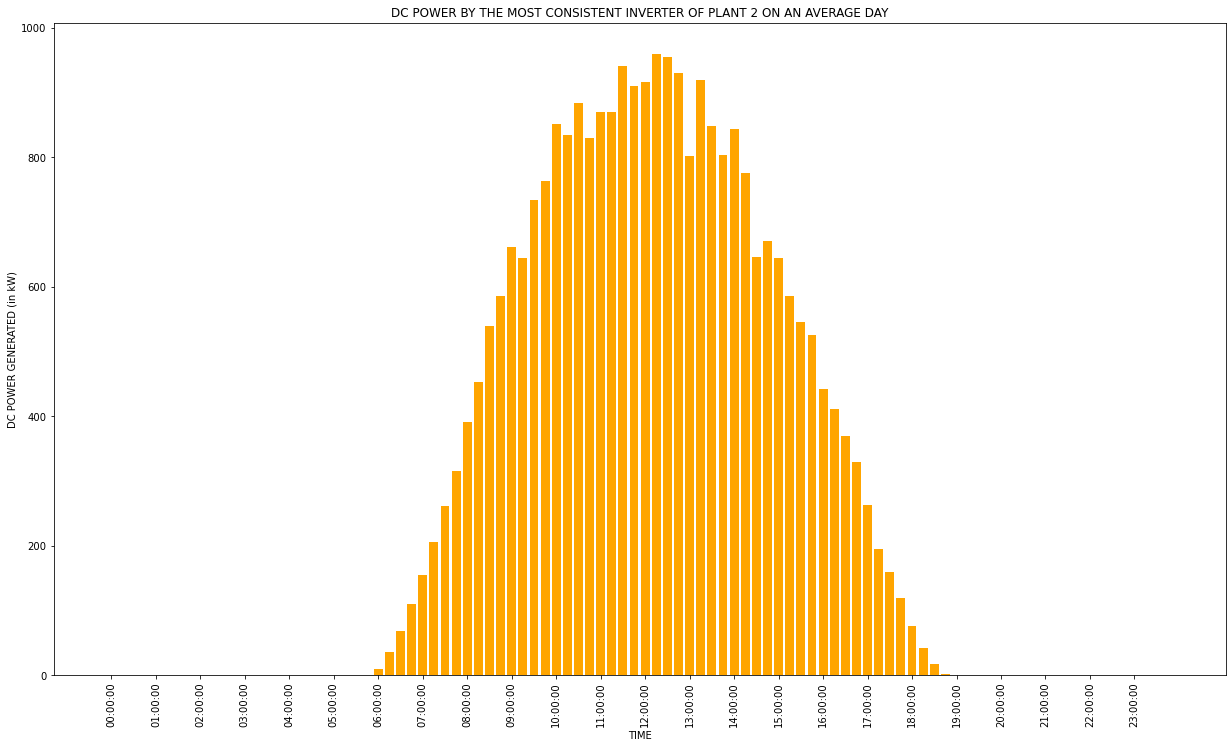

In [23]:
plant2m = pd.DataFrame({'SOURCE_KEY': dfGeneration_2['SOURCE_KEY'], 'TIME': dfGeneration_2['TIME'], 'DC_POWER': dfGeneration_2['DC_POWER']})
plant2m = plant2m.groupby(['SOURCE_KEY', 'TIME']).mean()
StartInv = int()
source_key_check = dfGeneration_2['SOURCE_KEY'].unique()

p = dfGeneration_2['DATE_TIME'].dt.time
uniqueTime = p.unique()
for o in range(0,24*4):
    uniqueTime[o] = str(uniqueTime[o])
TimeList = list()
for i in range(0,24*4, 4):
    TimeList.append(uniqueTime[i])
#SINCE EACH SOURCE KEY HAS 24*4 = 96 ROWS, Whichever Value of source_key_check the invertor is, it starts at the 96*(i) position of the new plant1m and ends at the 96*(i) + 95th position
for i in range(0,22):
    if source_key_check[i] == 'IQ2d7wF4YD8zU1Q':
        StartInv = 96*(i)
plt.figure(figsize = (21, 12))
plt.bar(uniqueTime,plant2m[StartInv:StartInv+96]['DC_POWER'], color = 'orange')
plt.xticks(TimeList, rotation = 90)
plt.xlabel('TIME')
plt.ylabel('DC POWER GENERATED (in kW)')
plt.title('DC POWER BY THE MOST CONSISTENT INVERTER OF PLANT 2 ON AN AVERAGE DAY')
plt.show()

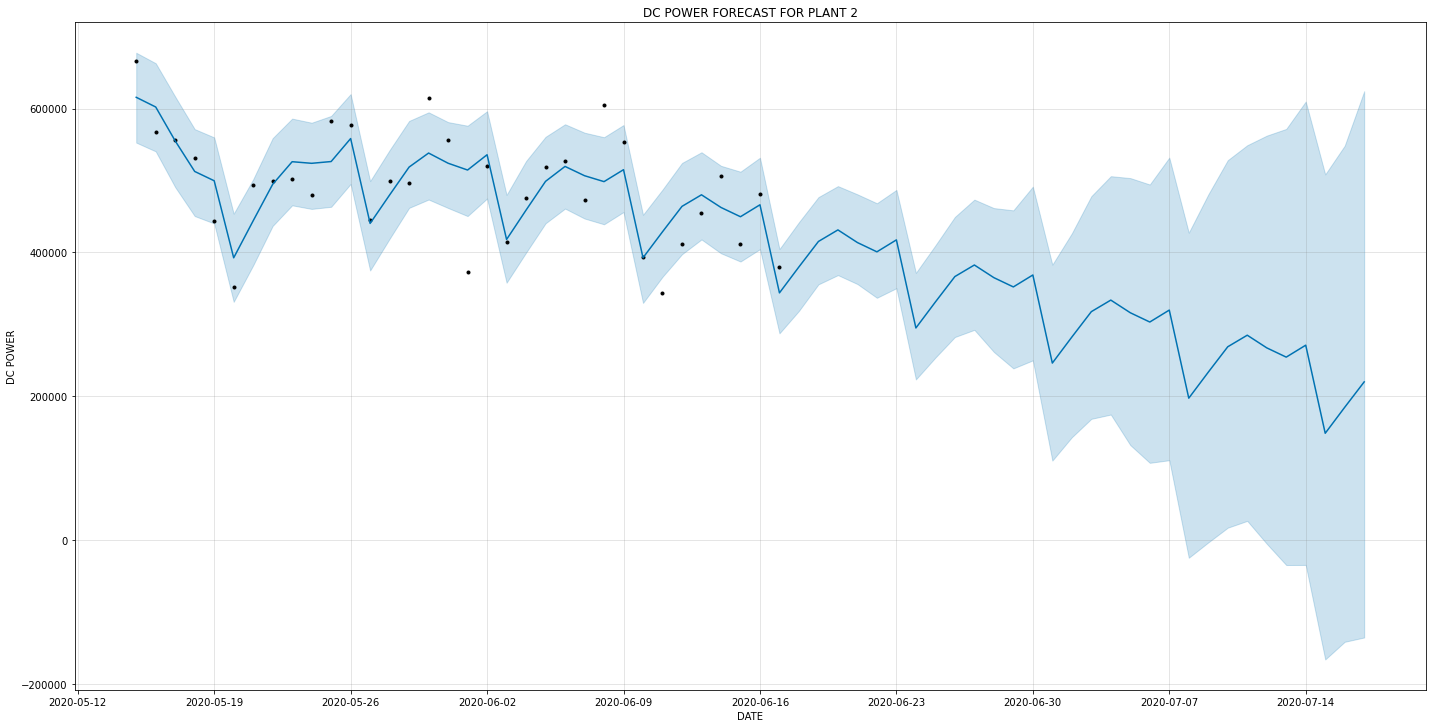

In [24]:
#FBProphet
ds2 = dfGeneration_2['DATE'].unique()
y2 = dfGeneration_2.groupby('DATE')['DC_POWER'].sum()
df2 = pd.DataFrame({'ds':ds2, 'y':y2})
op2 = fb.Prophet(changepoint_prior_scale = 1)
op2.fit(df2)
prediction2 = op2.make_future_dataframe(periods = 30, freq = 'D')
prediction2 = op2.predict(prediction2)
op2.plot(prediction2, xlabel = 'DATE', ylabel = 'DC POWER', figsize = (20,10))
plt.title("DC POWER FORECAST FOR PLANT 2")
plt.show()

here!" Replied Mahi. "Perfect! I'm just out of words. This trip was just perfect for me, the deal is done and my team will contact you by the next week. I'm impressed! Thank you so much Munshi, and you too Mahi!" Bason exclaimed. "No issues sir." Munshi replied.